<a href="https://colab.research.google.com/github/irytck/Travel-Insurance-Purchases-Prediction/blob/main/Client_Segmentation_Travel_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Customer Segmentation and Travel Insurance Demand Prediction***

# Descripción de la base de datos: variables y su significado.

Una agencia de viajes ofrece a sus clientes un paquete de seguro de viaje, que incluye cobertura contra Covid. Basándose en el historial de su base de datos, la empresa necesita identificar qué clientes estarían interesados en adquirir este seguro. Los datos provienen del rendimiento y las ventas del paquete durante un período de tiempo en el que se ofreció el seguro a algunos clientes.

**Primer Archivo: Clientes Antiguos de la Compañía de Viajes**
   Número de Observaciones: 682

**Segundo Archivo: Nuevos Clientes de la Compañía de Viajes**
   Número de Observaciones: 1303

**Variables:**

1. **Edad:** Edad del Cliente.
2. **Trabajador del Sector Público:** Indica si el Cliente trabaja para el Gobierno o no.
3. **Graduado o No:** Indica si el Cliente tiene un título universitario.
4. **Ingreso Anual:** Ingreso anual del Cliente en rupias indias (redondeado al valor más cercano de 50,000 rupias).
5. **Miembros de la Familia:** Número de miembros en la familia del Cliente.
6. **Enfermedad Crónica:** Indica si el Cliente sufre de alguna enfermedad crónica como diabetes, hipertensión o asma.
7. **Viajero Frecuente:** Datos derivados basados en el historial del Cliente al reservar boletos de avión en al menos cuatro instancias diferentes en los últimos dos años (2017-2019).
8. **Viaje al Extranjero:** Indica si el Cliente ha viajado alguna vez a un país extranjero (no necesariamente utilizando los servicios de la empresa).
9. **Seguro de Viaje (Solo en el Primer Archivo):** Indica si el Cliente compró el paquete de seguro de viaje. (1=Sí, 0=No).

# **Objetivos del Proyecto**

En este contexto, el objetivo principal de este proyecto es desarrollar un modelo de clasificación que identifique a los clientes potenciales interesados en adquirir el paquete de seguro de viaje ofrecido por la agencia de viajes. Para lograr este objetivo, se plantean los siguientes objetivos específicos:

**Exploración y Preprocesamiento de Datos**
Realizar un análisis de los datos proporcionados, comprendiendo las características demográficas y comportamiento de los clientes.
Evaluar y abordar el desbalance de clases en los datos para evitar sesgos en el modelo resultante.
Implementar técnicas como sobremuestreo para equilibrar las clases si es necesario.
  
**Identificar las características más relevantes**
Las características más importantes que podrían influir en la decisión de compra del seguro de viaje.

**Desarrollar y Evaluar los Modelos de Clasificación**
Explorar varios algoritmos de clasificación, incluyendo Boosting, Random Forest, Naive Bayes y Árbol de Decisión, para determinar cuál ofrece el mejor rendimiento predictivo.
Evaluar los modelos utilizando métricas adecuadas, considerando especialmente el equilibrio entre falsos positivos y falsos negativos.

**Optimizar los Hiperparámetros**
Realizar la optimización de hiperparámetros para los modelos seleccionados con el fin de mejorar su precisión y capacidad predictiva.

**Interpretar y Comunicar los Resultados**
Interpretar la importancia de las características identificadas por el modelo para proporcionar insights valiosos a la agencia de viajes.
Comunicar los resultados, brindando recomendaciones sobre cómo utilizar eficazmente el modelo para identificar clientes potenciales interesados en el seguro de viaje.

Al alcanzar estos objetivos, se espera proporcionar a la agencia de viajes una herramienta confiable y precisa para identificar a los clientes que probablemente estén interesados en adquirir el seguro de viaje, lo que contribuirá significativamente a las estrategias de ventas y marketing de la empresa en el actual escenario de viajes y turismo.

# Exploración y Preprocesamiento de Datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
old_clients = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio/Travel Insurance/data/Travel Company Old Clients.csv", delimiter = ';')

In [ ]:
new_clients = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio/Travel Insurance/data/Travel Company New Clients.csv", delimiter = ';')

In [ ]:
old_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       682 non-null    int64
 1   Government Sector Worker  682 non-null    int64
 2   GraduateOrNot             682 non-null    int64
 3   AnnualIncome              682 non-null    int64
 4   FamilyMembers             682 non-null    int64
 5   ChronicDiseases           682 non-null    int64
 6   FrequentFlyer             682 non-null    int64
 7   EverTravelledAbroad       682 non-null    int64
 8   TravelInsurance           682 non-null    int64
dtypes: int64(9)
memory usage: 48.1 KB


In [ ]:
# Convertir variables categóricas a factor
categorical_variables = ['Government Sector Worker', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
old_clients[categorical_variables] = old_clients[categorical_variables].astype('category')

# Estadisticas para variables categoricas
categorical_stats = old_clients.select_dtypes(include=['category']).describe()

# Proporciones para variables categóricas
categorical_proportions = old_clients.select_dtypes(include=['category']).apply(lambda x: x.value_counts(normalize=True) * 100)

In [ ]:
# variables numéricas
numerical_variables = ['Age', 'AnnualIncome', 'FamilyMembers']

numeric_stats = old_clients.describe()
numeric_stats = numeric_stats.round(1).astype(int)

In [ ]:
from tabulate import tabulate

print("Estadísticas para variables numéricas:")
print(numeric_stats)

print("\nProporciones para variables categóricas:")
print(tabulate(round(categorical_proportions,2), headers='keys', tablefmt='pretty'))


Estadísticas para variables numéricas:
       Age  AnnualIncome  FamilyMembers
count  682           682            682
mean    29        947800              4
std      2        371392              1
min     25        300000              2
25%     28        650000              4
50%     29        950000              5
75%     32       1250000              6
max     35       1800000              9

Proporciones para variables categóricas:
+---+--------------------------+---------------+-----------------+---------------+---------------------+-----------------+
|   | Government Sector Worker | GraduateOrNot | ChronicDiseases | FrequentFlyer | EverTravelledAbroad | TravelInsurance |
+---+--------------------------+---------------+-----------------+---------------+---------------------+-----------------+
| 0 |          74.19           |     14.96     |      71.99      |     78.89     |        81.23        |      66.28      |
| 1 |          25.81           |     85.04     |      28.01      | 

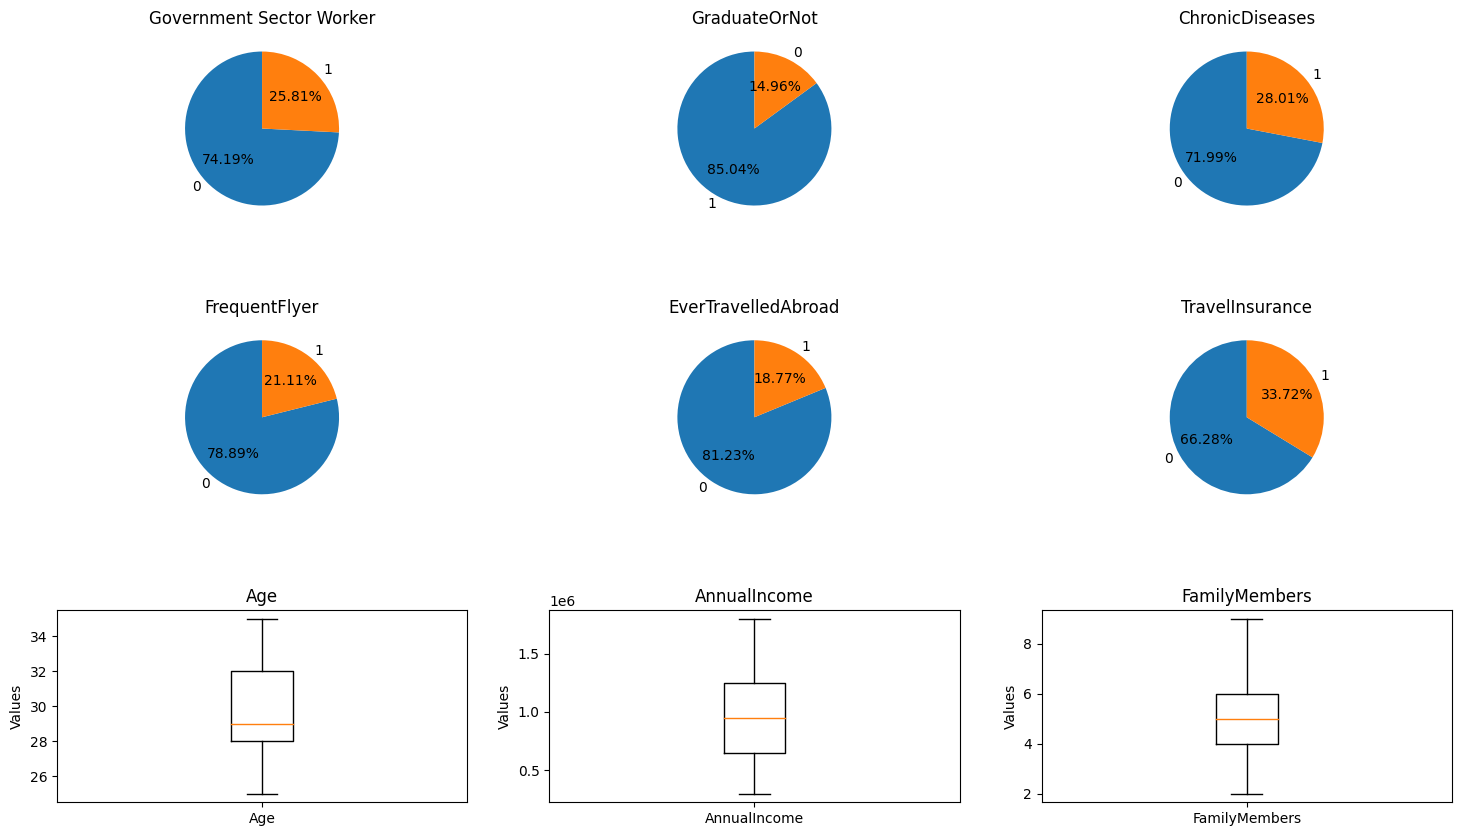

In [ ]:
# Visualisar las estadisticas
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5)

# Pie chart para variables categóricas
for i, variable in enumerate(categorical_variables):
    row = i // 3
    col = i % 3
    categorical_counts = old_clients[variable].value_counts()
    axs[row, col].pie(categorical_counts, labels=categorical_counts.index, autopct='%1.2f%%', startangle=90)
    axs[row, col].set_title(variable)

# Box-plot para variables numéricas
for i, variable in enumerate(numerical_variables):
    col = i
    axs[2, col].boxplot(old_clients[variable])
    axs[2, col].set_xticklabels([variable])
    axs[2, col].set_ylabel('Values')
    axs[2, col].set_title(variable)

plt.show()

Estas estadísticas proporcionan una visión general de las variables numéricas y categóricas.

**Variables Numéricas:**
- **Age:** La edad promedio de los clientes es 29 años, con un rango de 25 a 35 años. La mayoría de los clientes tienen entre 28 y 32 años.
- **AnnualIncome:** El ingreso anual promedio es de aproximadamente 947,800 rupias indias, con una variación significativa entre los clientes. El ingreso mínimo es de 300,000 rupias y el máximo es de 1,800,000 rupias.
- **FamilyMembers:** La cantidad promedio de miembros en la familia de los clientes es 4, con un mínimo de 2 y un máximo de 9. La mayoría de las familias tienen entre 4 y 6 miembros.

**Variables Categóricas:**
- **Government Sector Worker:** Alrededor del 25.81% de los clientes trabajan en el sector público, mientras que el 74.19% son empleados del sector privado/autonomos o no trabajan.
- **GraduateOrNot:** Aproximadamente el 85.04% de los clientes son graduados, mientras que el 14.96% no lo son.
- **ChronicDiseases:** Cerca del 71.99% de los clientes no tienen enfermedades crónicas, mientras que el 28.01% las tienen.
- **FrequentFlyer:** El 78.89% de los clientes no son viajeros frecuentes, mientras que el 21.11% sí lo son.
- **EverTravelledAbroad:** Aproximadamente el 81.23% de los clientes no ha viajado al extranjero, mientras que el 18.77% sí lo ha hecho.
- **TravelInsurance:** El 66.28% de los clientes no compraron el seguro de viaje, mientras que el 33.72% lo compraron.


In [ ]:
tab = pd.crosstab(index = old_clients['TravelInsurance'],
                  columns = 'count')
tab

col_0,count
TravelInsurance,
0,452
1,230


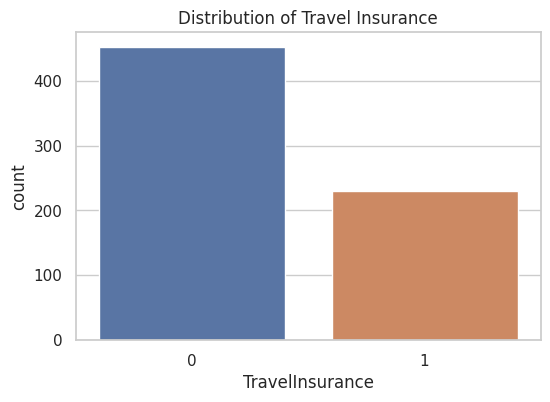

In [ ]:
# Distribucion de la variable objetivo
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='TravelInsurance', data=old_clients)
plt.title('Distribution of Travel Insurance')
plt.show()

La distribución de los clientes en el conjunto de datos en función de si tienen o no un seguro de viaje. Hay más clientes sin seguro de viaje (452) en comparación con aquellos que tienen un seguro de viaje (230).

In [ ]:
tab_freq = pd.crosstab(index = old_clients['TravelInsurance'],
                        columns = [old_clients['ChronicDiseases'], old_clients['FrequentFlyer']],
                        margins = True)

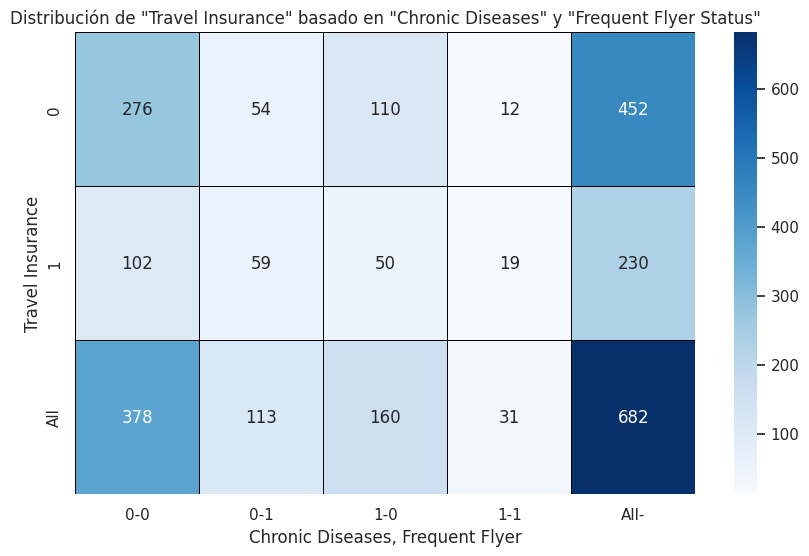

In [ ]:
# Plot frequencias
plt.figure(figsize=(10, 6))
sns.heatmap(tab_freq, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5, linecolor='black')
plt.title('Distribución de "Travel Insurance" basado en "Chronic Diseases" y "Frequent Flyer Status"')
plt.xlabel('Chronic Diseases, Frequent Flyer')
plt.ylabel('Travel Insurance')
plt.show()

La tabla proporciona una visión detallada de la distribución de los clientes en función de tres características: la posesión de un seguro de viaje, la presencia de enfermedades crónicas y si es viajero frequente o no.

Por ejemplo, de los 230 clientes con seguro de viaje, 161 de ellos no tienen enfermedades crónicas. Dentro de este grupo, 102 no son viajeros frecuentes, mientras que 59 sí lo son. Por otro lado, los restantes 69 clientes con seguro de viaje padecen enfermedades crónicas. De este subgrupo, solo 19 son viajeros frecuentes.


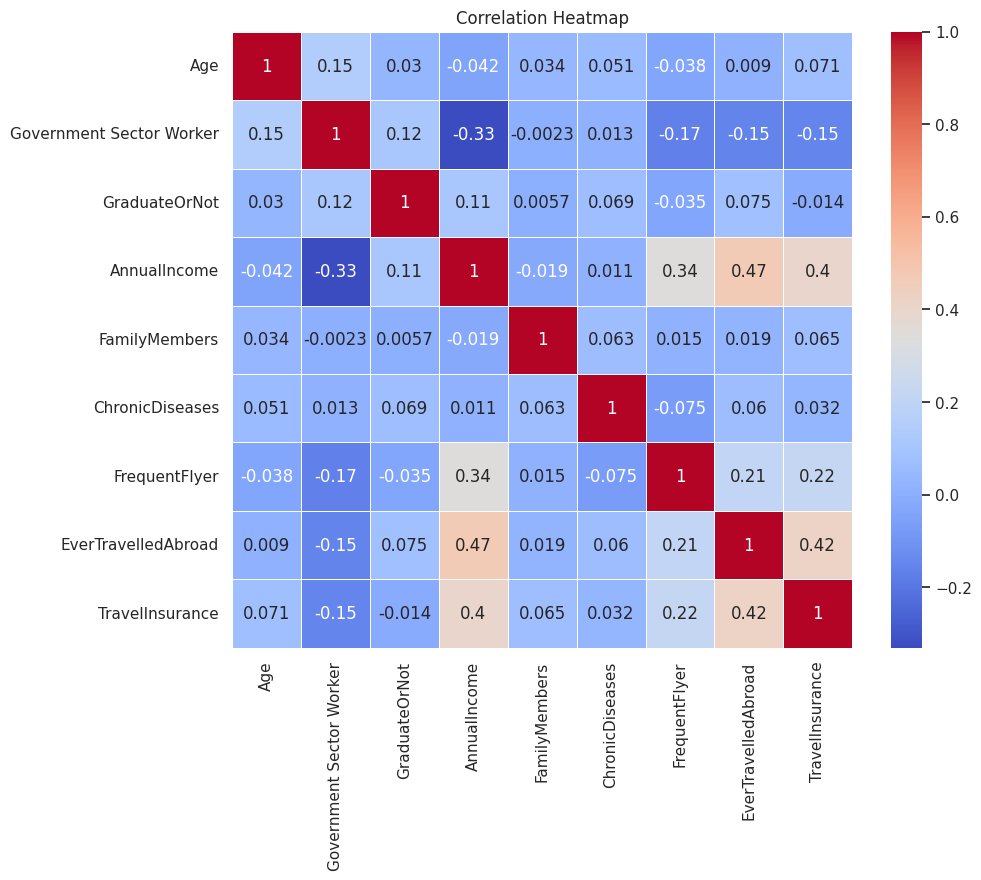

In [ ]:
# Matriz de correlacion
data_correlation = old_clients.astype(int)
correlation_matrix = data_correlation.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Algunas correlaciones que podrían considerarse significativas son:
   - **AnnualIncome con Travel Insurance, FrequentFlyer y EverTravelledAbroad:** Estas variables tienen correlaciones positivas moderadas con AnnualIncome, lo que sugiere que los clientes con ingresos más altos tienen más probabilidades de ser viajeros frecuentes o de haber viajado al extranjero y comprar el seguro de viaje.
   - **EverTravelledAbroad con TravelInsurance:** Hay una correlación positiva moderada entre EverTravelledAbroad y TravelInsurance, lo que indica que los clientes que han viajado al extranjero tienen más probabilidades de comprar seguro de viaje.

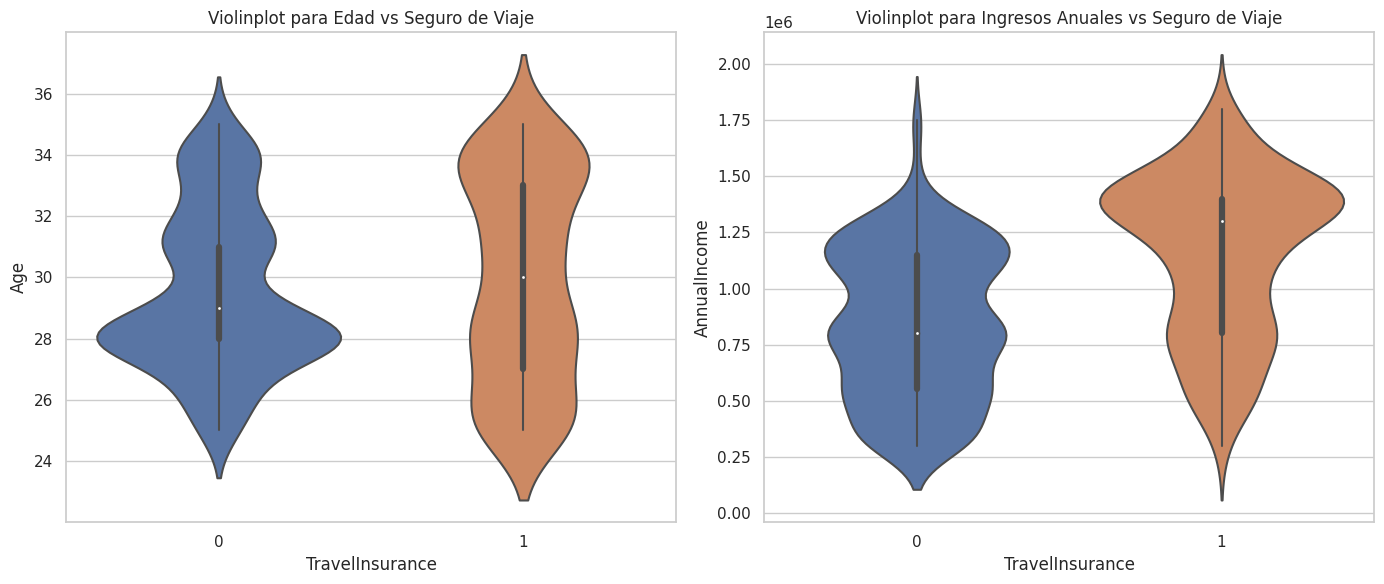

In [ ]:
# Violinplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Age vs TravelInsurance
sns.violinplot(x='TravelInsurance', y='Age', data=old_clients, ax=axes[0])
axes[0].set_title('Violinplot para Edad vs Seguro de Viaje')

# AnnualIncome vs Travel Insurance
sns.violinplot(x='TravelInsurance', y='AnnualIncome', data=old_clients, ax=axes[1])
axes[1].set_title('Violinplot para Ingresos Anuales vs Seguro de Viaje')

plt.tight_layout()
plt.show()

Los gráficos muestran la relación entre las variables `Age`, `AnnualIncome` con respecto a la variable respuesta `TravelInsurance`.

Los violines representan la densidad de las distribuciones de la variable para cada categoría de `TravelInsurance` (0-naranja, 1-azul). Cuanto más ancho sea el violín en una cierta posición, mayor es la densidad en esa posición.

**Gráfico 1: Edad vs Seguro de Viaje**

Este gráfico ilustra la distribución de edades entre los clientes con y sin seguro de viaje. El violín correspondiente a TravelInsurance = 1 (color naranja) muestra una densidad relativamente uniforme, con una pequeña disminución en la densidad a los 30 años y un aumento a los 34 años, indicando una mayor concentración de clientes con seguro de viaje en esa franja de edad. En contraste, el violín para TravelInsurance = 0 (color azul) es más ancho a los 28 años, señalando una mayor densidad de clientes sin seguro de viaje en esa edad específica.

**Gráfico 2: Ingreso Anual vs Seguro de Viaje**

Este gráfico presenta la distribución de ingresos anuales de los clientes en relación con la presencia o ausencia de seguro de viaje. Se destaca que el violín correspondiente a TravelInsurance = 1 (color naranja) muestra una mayor densidad de clientes con seguro en la categoría de ingresos entre 1.25 y 1.5 millones de rupias, indicando que los clientes con ingresos en este rango tienen más probabilidades de adquirir un seguro de viaje.

# Desarrollo y Evaluación de Modelos

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

### Preprocesamiento

Antes de entrenar un modelo de clasificación, es crucial realizar un preprocesamiento adecuado en los datos para asegurarse de que estén en el formato correcto y tengan la escala adecuada. La estandarización y codificación de las variables numéricas y categóricas, respectivamente, garantizan que el modelo pueda interpretar y aprender de los datos de manera efectiva.

La estandarizacion de las variables numéricas se realiza restando la media y dividiendo por la desviación estándar. Esto es importante para asegurarse de que todas las variables numéricas tengan una escala similar, lo que facilita la convergencia de muchos algoritmos de aprendizaje automático y evita que las variables con magnitudes más grandes dominen el modelo.

Y en cuanto a las variables categoricas, se convierten en representaciones binarias (variables dummy), lo que permita a los algoritmos de aprendizaje automático trabajar con variables categóricas.

In [ ]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_variables),
        ('cat', cat_transformer, categorical_variables)])

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'AnnualIncome', 'FamilyMembers']),
                                ('cat', OneHotEncoder(),
                                 ['Government Sector Worker', 'GraduateOrNot',
                                  'ChronicDiseases', 'FrequentFlyer',
                                  'EverTravelledAbroad', 'TravelInsurance'])])

In [ ]:
# Espacio X - variables explicativas
X = old_clients.drop('TravelInsurance', axis=1)
# Espacio Y - variable respuesta
y = old_clients["TravelInsurance"]

**Justificación de la Decisión de No Implementar la Técnica SMOTE**

Inicialmente, se consideró la implementación de la técnica SMOTE debido al desbalanceo de clases en los datos: la clase 0 (sin seguro) tiene casi el doble de instancias que la clase 1 (con seguro). El desbalanceo de clases puede llevar a un sesgo en el modelo de machine learning, ya que el modelo podría volverse más habilidoso para predecir la clase mayoritaria y menos preciso para predecir la clase minoritaria. La técnica SMOTE se propuso como solución para abordar este problema. Al generar instancias sintéticas de la clase minoritaria, se busca equilibrar las proporciones de las clases, lo que teóricamente mejora la capacidad del modelo para aprender patrones de ambas clases y, en última instancia, mejorar las predicciones del modelo.

Sin embargo, tras realizar experimentos comparativos con y sin la técnica SMOTE, se observó un resultado sorprendente: los modelos entrenados sin generar datos sintéticos superaron significativamente en rendimiento a los modelos que incorporaban instancias sintéticas mediante SMOTE.

Esta observación plantea una pregunta importante: ¿por qué los modelos mejoraron sin la aplicación de SMOTE? Hay varias razones que podrían explicar este fenómeno:

- En este conjunto de datos, la naturaleza de las relaciones entre las variables y la decisión de compra de un seguro de viaje podría no beneficiarse de la introducción de datos sintéticos.

- El conjunto de datos original podría contener suficientes ejemplos de la clase minoritaria para que el modelo aprenda patrones efectivos sin necesidad de instancias sintéticas.

La decisión de no implementar SMOTE se basa en una evaluación exhaustiva del rendimiento del modelo y en la observación de que los resultados fueron más satisfactorios y consistentes sin la introducción de datos sintéticos. Los modelos sin SMOTE lograron un equilibrio adecuado entre precisión y exhaustividad, lo que indicó que podían hacer predicciones efectivas sin la necesidad de instancias sintéticas. Esta elección se respalda en la evidencia empírica proporcionada por las pruebas comparativas, lo que demuestra que, en este caso específico, la adición de datos sintéticos no contribuyó significativamente a mejorar las predicciones del modelo de clasificación.

In [ ]:
# Dividir en conjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Entrenar modelos ML

In [ ]:
# Funcion Helper Plot Consfusion Matrix

def plot_cm(y_true, y_pred, labels=['Negativo', 'Positivo']):
    """
    Visualiza la matriz de confusión.
    Args:
    y_true : array. Etiquetas reales.
    y_pred : array. Etiquetas predichas.
    labels : Lista de etiquetas para las clases, optional (default=['Negativo', 'Positivo'])
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title('Matriz de Confusión')
    plt.show()


Se utiliza la técnica de Grid Search para encontrar la mejor combinación de hiperparámetros para el modelo de clasificación.
GridSearchCV es un método de búsqueda de cuadrícula que busca a través de todas las combinaciones de hiperparámetros especificadas.

### Regresion Logísitca

In [ ]:
LR = LogisticRegressionCV(cv=5, solver='lbfgs', random_state=42)

# Ajustar el modelo
LR.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_lr = LR.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_lr))

Precisión del modelo: 0.79
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        94
           1       0.82      0.42      0.55        43

    accuracy                           0.79       137
   macro avg       0.80      0.69      0.71       137
weighted avg       0.79      0.79      0.76       137



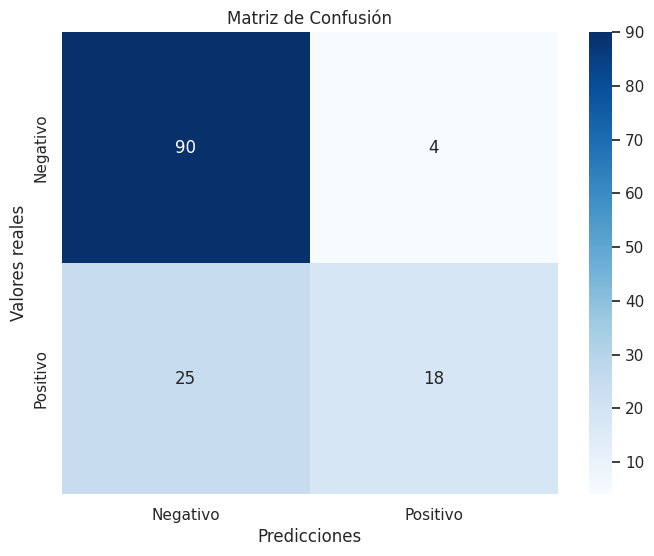

In [ ]:
# Confusion Matrix
plot_cm(y_test, y_pred_lr)

### KNN

In [ ]:
knn_model = KNeighborsClassifier()

# Buscar Mejores Hiperparametros
param_grid = {'n_neighbors': np.arange(1, 25)} # número de vecinos que se evaluara
KNN = GridSearchCV(knn_model, param_grid, cv=5)

# Ajustar el modelo
KNN.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_knn = KNN.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_knn))

Precisión del modelo: 0.82
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        94
           1       0.85      0.51      0.64        43

    accuracy                           0.82       137
   macro avg       0.83      0.73      0.76       137
weighted avg       0.82      0.82      0.80       137



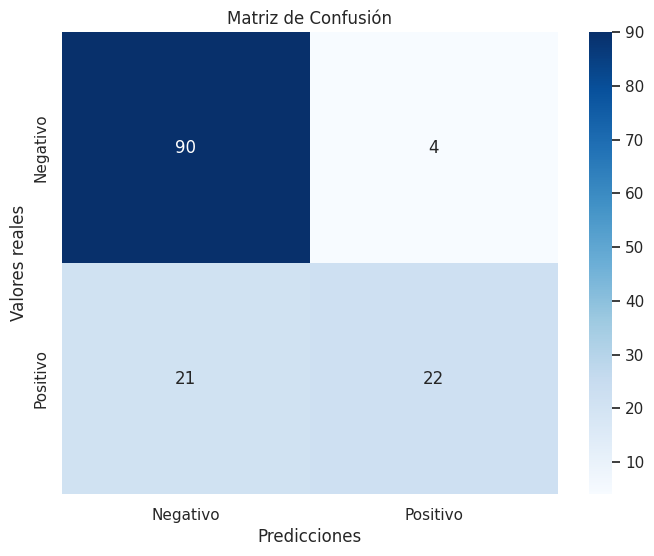

In [ ]:
# Confusion Matrix
plot_cm(y_test, y_pred_knn)

### Random Forest

In [ ]:
gridsearch_forest = RandomForestClassifier()

params = {
    "n_estimators": [100, 200, 300], # número de árboles en el bosque
    "max_depth": [10,20,30], # profundidad máxima de los árboles
    "min_samples_leaf" : [2, 5, 10] # número mínimo de muestras requeridas para ser un nodo hoja
} # las combinaciones de hiperparámetros que se evaluarán durante la búsqueda de la mejor combinación.

RF = GridSearchCV(gridsearch_forest, param_grid=params, cv=5) # validación cruzada con 5 pliegues (cv=5), 5 iteraciones de entrenamiento y prueba.

# Ajustar el modelo
RF.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_rf = RF.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_rf))


Precisión del modelo: 0.87
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        94
           1       0.96      0.60      0.74        43

    accuracy                           0.87       137
   macro avg       0.90      0.80      0.83       137
weighted avg       0.88      0.87      0.86       137



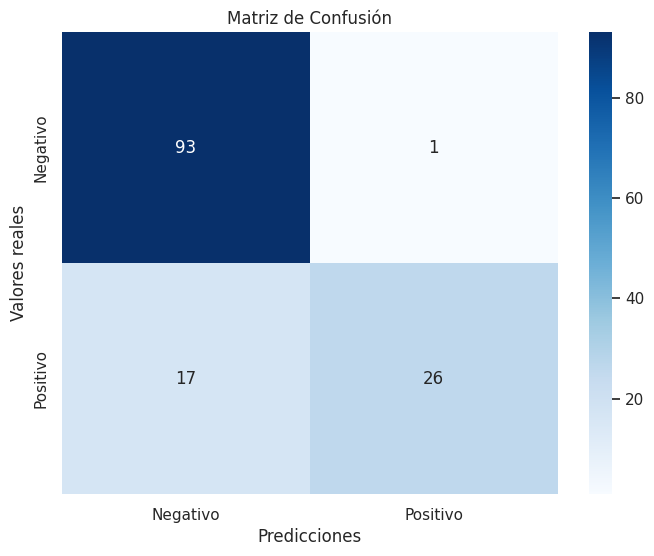

In [ ]:
plot_cm(y_test, y_pred_rf)

### Arbol de Clasificacion
Ajustamos el modelo de árbol de Clasificación que nos permite interpretar cómo se están tomando las decisiones en cada nodo y qué variables son importantes para la clasificación. Además, se pueden identificar los nodos que tienen una mayor tasa de error o impureza en la clasificación para considerar posibles mejoras en el modelo.

1. Construcción del árbol máximo (dando un valor muy bajo al estadístico Cp),
2. poda del árbol y (dando el valor al estadístico Cp que minimiza el xerror),
3. selección del árbol óptimo por validación cruzada (se consigue puesto que es el minimo xerror).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Ajustar el modelo
CT = DecisionTreeClassifier(random_state=42)
CT.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_ct = CT.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_ct)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_ct))

Precisión del modelo: 0.76
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        94
           1       0.62      0.60      0.61        43

    accuracy                           0.76       137
   macro avg       0.72      0.72      0.72       137
weighted avg       0.76      0.76      0.76       137



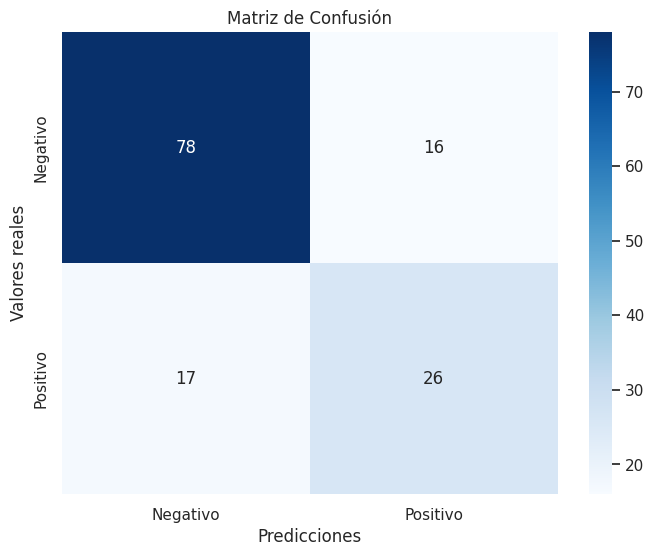

In [ ]:
plot_cm(y_test, y_pred_ct)

La técnica de poda del árbol de clasificación se puede realizar utilizando el parámetro max_depth del clasificador de árbol de decisión. Ajustando este parámetro, se puede limitar la profundidad del árbol, es una forma común de evitar el sobreajuste del modelo.

Para implementar la técnica de poda con la regla X-SE, primero hay que estimar el error mínimo (B) y el error estándar (SE). Luego, usando la fórmula B + x * SE para determinar la profundidad máxima del árbol.

In [ ]:
# Calcular el error mínimo (B) y el error estándar (SE)
B = 1 - accuracy_score(y_test, y_pred_ct)
SE = np.sqrt(B * (1 - B) / len(y_test))

# Definir el valor de x=1 para la regla X-SE
x = 1

# Calcular la profundidad máxima con la regla X-SE
max_depth_xse = int(CT.get_depth() - x * SE)

# Ajustar el modelo de árbol de clasificación con la profundidad máxima calculada
CT_pruned = DecisionTreeClassifier(max_depth=max_depth_xse, random_state=42)
CT_pruned.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba con el árbol podado
y_pred_ct_pruned = CT_pruned.predict(X_test)

# Evaluar el modelo
accuracy_pruned = accuracy_score(y_test, y_pred_ct_pruned)
print(f"Precisión del modelo podado: {accuracy_pruned:.2f}")

# Mostrar informe de clasificación
print("Informe de clasificación del modelo podado:")
print(classification_report(y_test, y_pred_ct_pruned))

Precisión del modelo podado: 0.80
Informe de clasificación del modelo podado:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        94
           1       0.70      0.60      0.65        43

    accuracy                           0.80       137
   macro avg       0.77      0.74      0.75       137
weighted avg       0.79      0.80      0.79       137



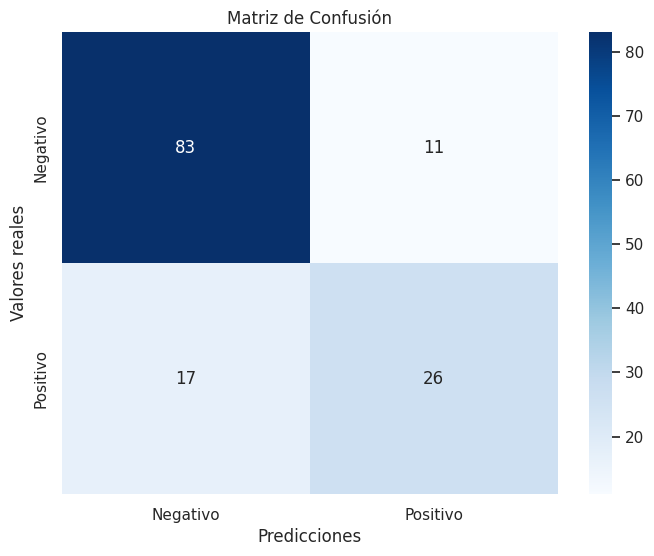

In [ ]:
plot_cm(y_test, y_pred_ct_pruned)

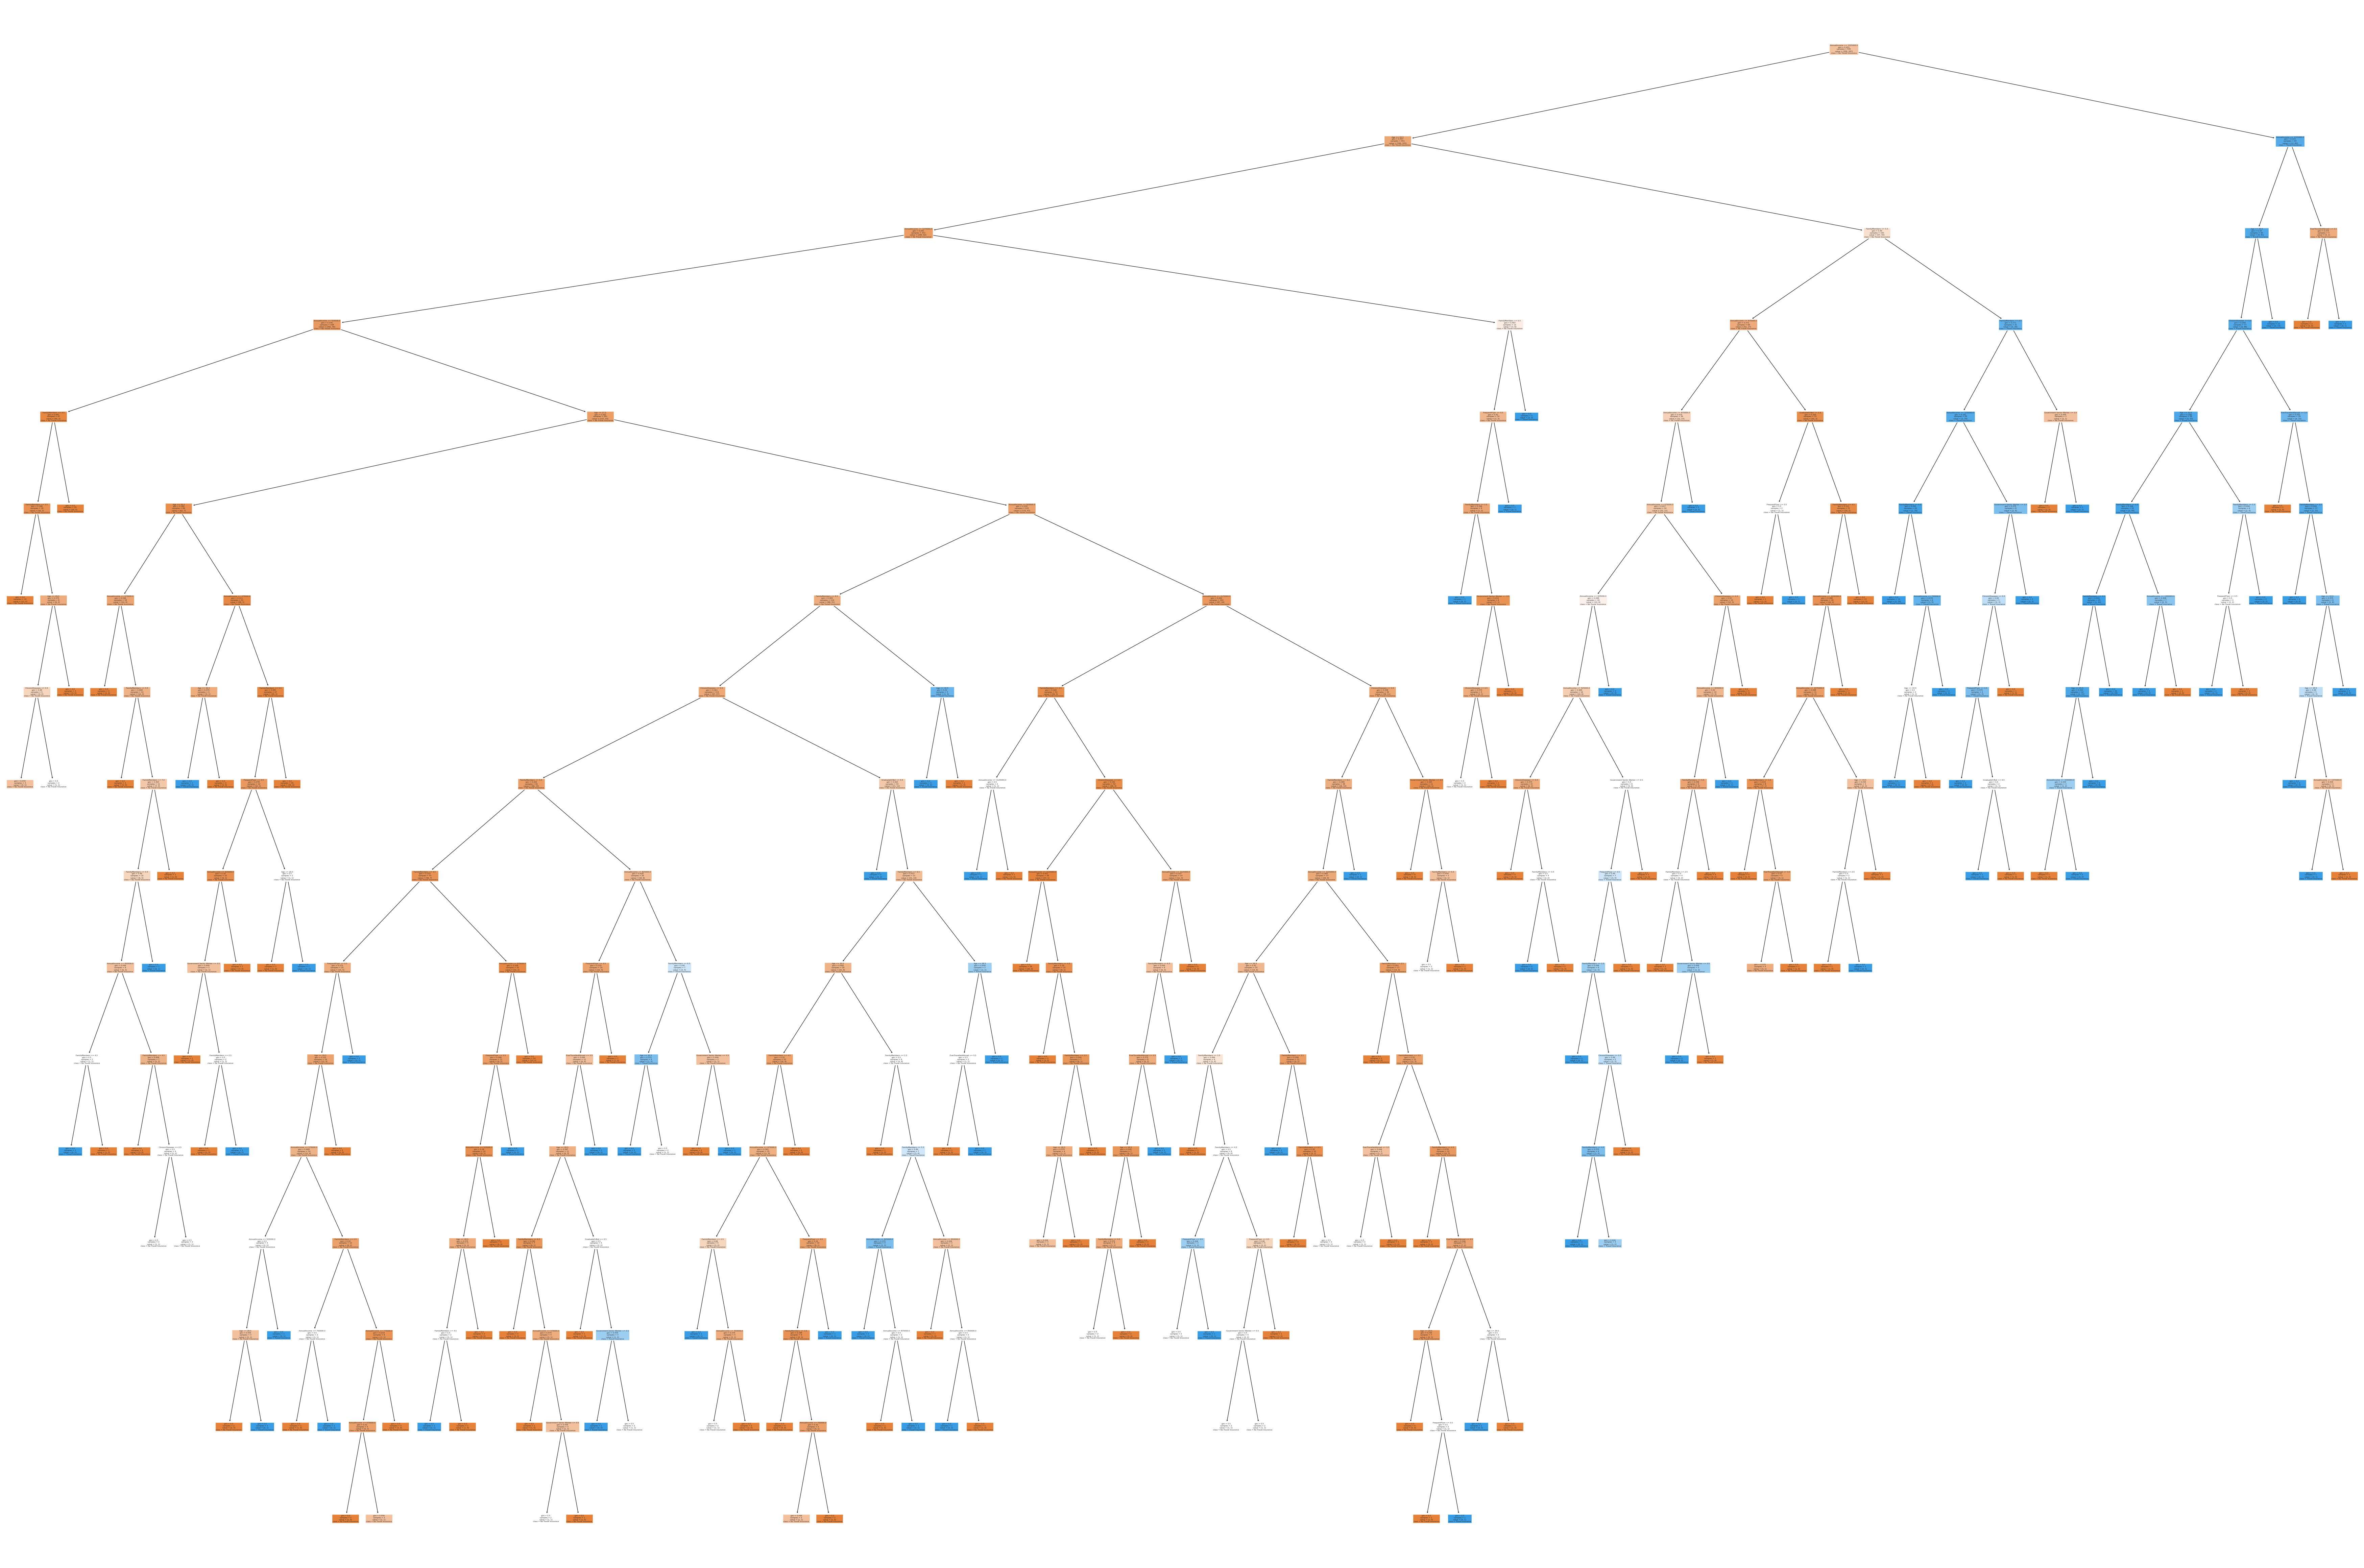

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(90, 60))
plot_tree(CT_pruned, filled=True, feature_names=X_train.columns, class_names=["No Travel Insurance", "Travel Insurance"])
plt.show()

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Ajustar el modelo de Naive Bayes con corrección de Laplace
NB = MultinomialNB(alpha=1)  # alpha=3 representa la corrección de Laplace
NB.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_nb = NB.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Precisión del modelo de Naive Bayes: {accuracy:.2f}")

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_nb))

Precisión del modelo de Naive Bayes: 0.75
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        94
           1       0.59      0.67      0.63        43

    accuracy                           0.75       137
   macro avg       0.72      0.73      0.72       137
weighted avg       0.76      0.75      0.76       137



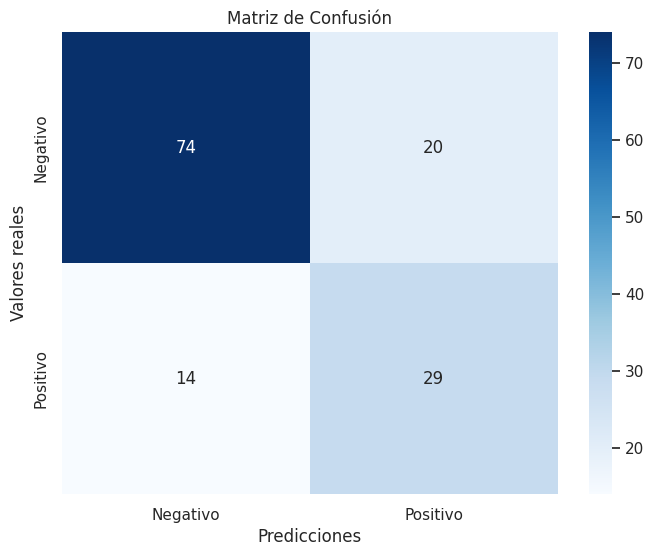

In [ ]:
plot_cm(y_test, y_pred_nb)

### SVM



In [ ]:
from sklearn.svm import SVC

# Parametros
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

SVM = SVC()

# encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Ajustar el modelo SVM
SVM = SVC(probability = True, C=best_C, gamma=best_gamma, random_state=42)
SVM.fit(X_train, y_train)

# predicciones
y_pred_svm = SVM.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_svm))


Precisión del modelo: 0.80
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        94
           1       0.79      0.51      0.62        43

    accuracy                           0.80       137
   macro avg       0.80      0.72      0.74       137
weighted avg       0.80      0.80      0.79       137



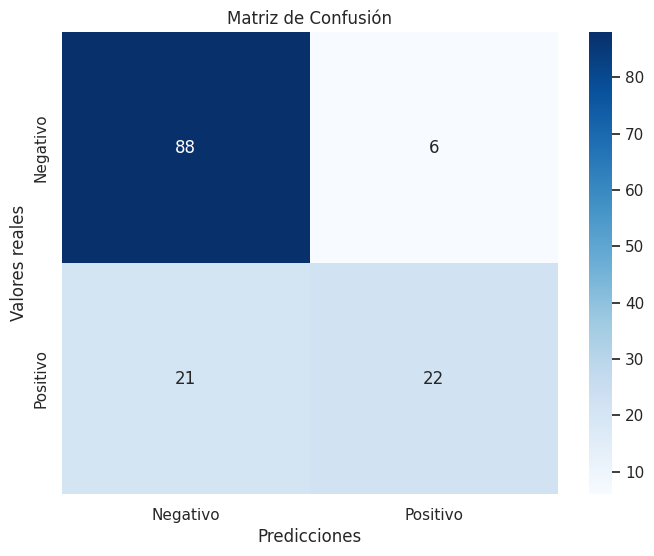

In [ ]:
plot_cm(y_test, y_pred_svm)

### Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(random_state=42)

# hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

#
grid_search = GridSearchCV(estimator=boosting, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_boosting = grid_search.best_estimator_


Mejores hiperparámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
y_pred_boost = best_boosting.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
accuracy = best_boosting.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred_boost))

Precisión del modelo: 0.88
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        94
           1       1.00      0.60      0.75        43

    accuracy                           0.88       137
   macro avg       0.92      0.80      0.84       137
weighted avg       0.89      0.88      0.87       137



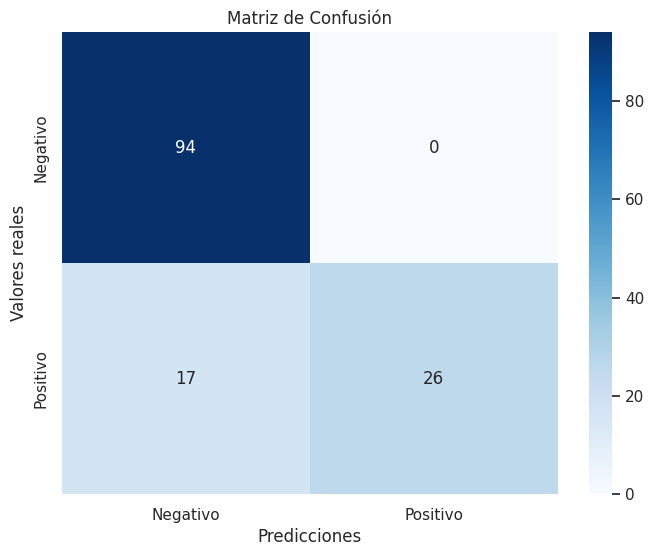

In [ ]:
plot_cm(y_test, y_pred_boost)

## Evaluación de modelos

### Curvas ROC

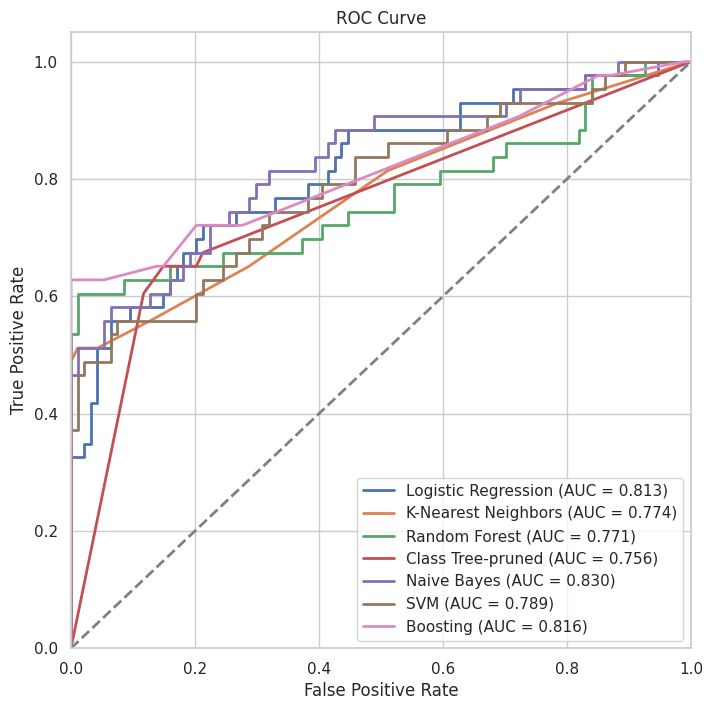

In [ ]:
plt.figure(figsize=(8, 8))

# Lista de modelos y sus etiquetas para la leyenda
models = [LR, KNN, RF, CT_pruned, NB, SVM, best_boosting]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Class Tree-pruned', 'Naive Bayes', 'SVM', 'Boosting']

for model, name in zip(models, model_names):
    y_predict_probabilities = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Para evaluar el rendimiento de los modelos de clasificación, utilizamos las curvas ROC, especialmente valiosas en situaciones de desequilibrio de clases como la nuestra. Estas representan la sensibilidad (tasa de verdaderos positivos) en el eje Y y la tasa de falsos positivos (1 - Especificidad) en el eje X para diversos umbrales de clasificación.

- **Regresión Logística:** La curva azul muestra un AUC de 0.813, indicando un buen rendimiento al estar alejada de la línea diagonal.
  
- **K-Nearest Neighbors (KNN):** La curva naranja tiene un AUC de 0.774, demostrando un rendimiento aceptable.

- **Random Forest:** La curva verde tiene un AUC de 0.762.

- **Árbol de Decisión Poda:** La curva roja tiene un AUC de 0.756.

- **Naive Bayes:** La curva púrpura muestra un AUC de 0.830, indicando un buen desempeño.

- **Máquinas de Soporte Vectorial (SVM):** La curva morada tiene un AUC de 0.789, mostrando un rendimiento razonable.

- **Boosting:** La curva rosa muestra un AUC de 0.816, destacando un buen rendimiento.

Estos valores de AUC indican que todos los modelos tienen un desempeño decente. Entre ellos, el modelo de Naive Bayes es el mejor de los presentados.

### Medidas de Ajuste

In [ ]:
# Calcular la precisión para cada modelo
precision_LR = precision_score(y_test, y_pred_lr)
accuracy_LR = accuracy_score(y_test, y_pred_lr)
f1_LR = f1_score(y_test, y_pred_lr)
recall_LR = recall_score(y_test, y_pred_lr)
specificity_LR = recall_score(y_test, y_pred_lr, pos_label=0)

precision_KNN = precision_score(y_test, y_pred_knn)
accuracy_KNN = accuracy_score(y_test, y_pred_knn)
f1_KNN = f1_score(y_test, y_pred_knn)
recall_KNN = recall_score(y_test, y_pred_knn)
specificity_KNN = recall_score(y_test, y_pred_knn, pos_label=0)

precision_RF = precision_score(y_test, y_pred_rf)
accuracy_RF = accuracy_score(y_test, y_pred_rf)
f1_RF = f1_score(y_test, y_pred_rf)
recall_RF = recall_score(y_test, y_pred_rf)
specificity_RF = recall_score(y_test, y_pred_rf, pos_label = 0)

precision_NB = precision_score(y_test, y_pred_nb)
accuracy_NB = accuracy_score(y_test, y_pred_nb)
f1_NB = f1_score(y_test, y_pred_nb)
recall_NB = recall_score(y_test, y_pred_nb)
specificity_NB = recall_score(y_test, y_pred_nb, pos_label = 0)

precision_CT = precision_score(y_test, y_pred_ct_pruned)
accuracy_CT = accuracy_score(y_test, y_pred_ct_pruned)
f1_CT = f1_score(y_test, y_pred_ct_pruned)
recall_CT = recall_score(y_test, y_pred_ct_pruned)
specificity_CT = recall_score(y_test, y_pred_ct_pruned, pos_label = 0)

precision_SVM = precision_score(y_test, y_pred_svm)
accuracy_SVM = accuracy_score(y_test, y_pred_svm)
f1_SVM = f1_score(y_test, y_pred_svm)
recall_SVM = recall_score(y_test, y_pred_svm)
specificity_SVM = recall_score(y_test, y_pred_svm, pos_label = 0)

precision_Boost = precision_score(y_test, y_pred_boost)
accuracy_Boost = accuracy_score(y_test, y_pred_boost)
f1_Boost = f1_score(y_test, y_pred_boost)
recall_Boost = recall_score(y_test, y_pred_boost)
specificity_Boost = recall_score(y_test, y_pred_boost, pos_label = 0)


data = {
    'Modelo': ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Naive Bayes', 'SVM', 'CT_pruned', 'Boosting'],
    'Precisión': [precision_LR, precision_KNN, precision_RF, precision_NB, precision_SVM, precision_CT, precision_Boost],
    'Accuracy': [accuracy_LR, accuracy_KNN, accuracy_RF, accuracy_NB, accuracy_SVM, accuracy_CT, accuracy_Boost],
    'F1 Score': [f1_LR, f1_KNN, f1_RF, f1_NB, f1_SVM, f1_CT, f1_Boost],
    'Sensitivity': [recall_LR, recall_KNN, recall_RF, recall_NB, recall_SVM, recall_CT, recall_Boost],
    'Specificity': [specificity_LR, specificity_KNN, specificity_RF, specificity_NB, specificity_SVM, specificity_CT, specificity_Boost]
}

df = pd.DataFrame(data)
df = df.round(3)

# Mostrar la tabla comparativa
print(tabulate(df, headers='keys', tablefmt='pretty'))

+---+---------------------+-----------+----------+----------+-------------+-------------+
|   |       Modelo        | Precisión | Accuracy | F1 Score | Sensitivity | Specificity |
+---+---------------------+-----------+----------+----------+-------------+-------------+
| 0 | Logistic Regression |   0.818   |  0.788   |  0.554   |    0.419    |    0.957    |
| 1 | K-Nearest Neighbors |   0.846   |  0.818   |  0.638   |    0.512    |    0.957    |
| 2 |    Random Forest    |   0.963   |  0.869   |  0.743   |    0.605    |    0.989    |
| 3 |     Naive Bayes     |   0.592   |  0.752   |   0.63   |    0.674    |    0.787    |
| 4 |         SVM         |   0.786   |  0.803   |   0.62   |    0.512    |    0.936    |
| 5 |      CT_pruned      |   0.703   |  0.796   |   0.65   |    0.605    |    0.883    |
| 6 |      Boosting       |    1.0    |  0.876   |  0.754   |    0.605    |     1.0     |
+---+---------------------+-----------+----------+----------+-------------+-------------+


En términos generales, los resultados del análisis indican que el modelo de Boosting muestra un rendimiento excepcional, logrando una precisión perfecta del 100% y un F1 Score de 75.4%. Este modelo es seguido de cerca por el modelo de Random Forest, que también alcanza una precisión perfecta y tiene un F1 Score de 73.2%. Ambos modelos han demostrado una habilidad significativa para clasificar correctamente los casos de compra de seguro, lo que se refleja en su alta precisión.

En comparación, los modelos de K-Nearest Neighbors (KNN) y Regresión Logística (LR) tienen precisiones del 84.6% y 81.8% respectivamente, pero muestran F1 Scores más bajos (63.8% y 55.4% respectivamente). Estos modelos, a pesar de ser precisos, parecen perder algunas instancias importantes, lo que afecta su capacidad para encontrar un equilibrio óptimo entre precisión y exhaustividad.

El modelo de Naive Bayes muestra un rendimiento inferior, con una precisión del 59.2% y un F1 Score de 63.0%. A pesar de tener una sensibilidad relativamente alta del 67.4%, su especificidad del 78.7% indica que tiende a clasificar incorrectamente algunos casos negativos, lo que reduce su capacidad de precisión global.


### Variables Más Influyentes
Importancia de las Características: Las medidas de importancia para cada característica utilizada en el entrenamiento.  Las características con una mayor importancia son las más influyentes en las predicciones.

                    Feature  Importance
3              AnnualIncome    0.725939
4             FamilyMembers    0.148696
0                       Age    0.113368
7       EverTravelledAbroad    0.008380
5           ChronicDiseases    0.003536
1  Government Sector Worker    0.000081
2             GraduateOrNot    0.000000
6             FrequentFlyer    0.000000


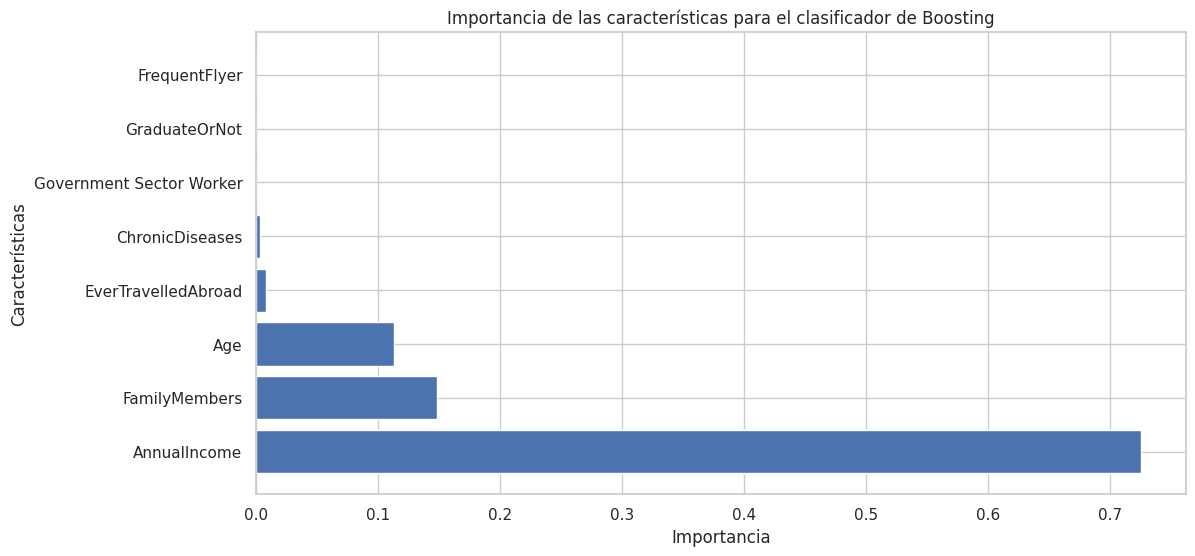

In [ ]:
# Caracteristicas Importantes para Boosting
feature_importances_boosting = best_boosting.feature_importances_

importances_boost = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_boosting
})

importances_boost = importances_boost.sort_values(by='Importance', ascending=False)

print(importances_boost)

plt.figure(figsize=(12, 6))
plt.barh(importances_boost['Feature'], importances_boost['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características para el clasificador de Boosting')
plt.show()


                    Feature  Importance
3              AnnualIncome    0.422410
0                       Age    0.180341
4             FamilyMembers    0.156942
7       EverTravelledAbroad    0.124201
6             FrequentFlyer    0.035973
5           ChronicDiseases    0.034201
1  Government Sector Worker    0.024627
2             GraduateOrNot    0.021307


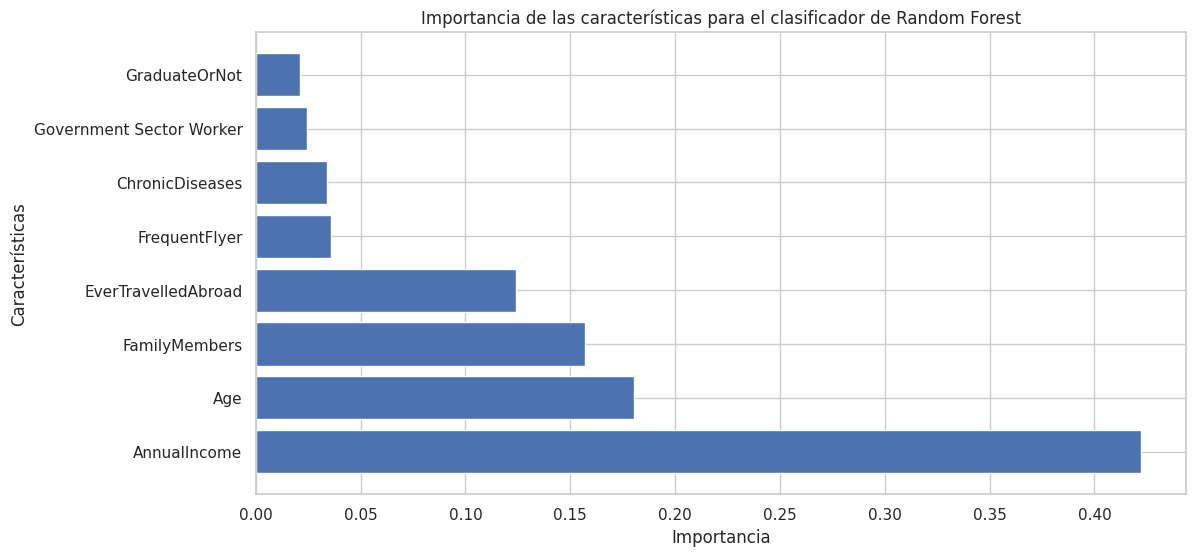

In [ ]:
from sklearn.inspection import permutation_importance

best_rf_model = RF.best_estimator_

# las características más importantes del modelo Random Forest
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

print(feature_importance_rf)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características para el clasificador de Random Forest')
plt.show()


En los dos gráficos anteriores se muestra la importancia relativa de las características para los modelos de Boosting y Random Forest. Cada número en la lista representa la proporción de la importancia total que cada característica tiene en las decisiones de clasificación de los modelos. Estos valores están normalizados y suman 1, lo que facilita la comparación de su impacto relativo en las predicciones del modelo.

Para ambos modelos, la característica más crucial es `AnnualIncome` (0.72/0.42). Esto indica que esta característica tiene el mayor impacto en las decisiones de clasificación del modelo y es fundamental para predecir si un cliente comprará el seguro de viaje.

En el modelo de Random Forest, la segunda característica más importante es `Age` (0.18), seguida de cerca por `FamilyMembers` (0.15) y `EverTravelledAbroad` (0.13). Mientras que en el modelo de Boosting, `FamilyMembers` (0.149) y `Age` (0.113) ocupan posiciones ligeramente inferiores en importancia. Estas características también tienen un impacto significativo en las predicciones, aunque menor que `AnnualIncome`.

Por otro lado, las características `FrequentFlyer` (0.042), `ChronicDiseases` (0.035), `GovernmentSectorWorker` (0.026) y `GraduateOrNot` (0.022) tienen una importancia menor en comparación con las principales para el modelo de Random Forest. Aunque su contribución al modelo es menor, aún desempeñan un papel en el proceso de toma de decisiones del modelo, aunque de manera limitada. En el modelo de Boosting, estas características tienen casi ningún impacto.

## Conclusiones
En nuestra evaluación de modelos para predecir la compra de seguros de viaje, todos mostraron un rendimiento decente según las curvas ROC. Entre ellos, Random Forest y Boosting se destacan. Ambos modelos destacan por su capacidad para clasificar correctamente los casos de compra de seguro, demostrando alta precisión.

En comparación, K-Nearest Neighbors (KNN) y Regresión Logística (LR), aunque son precisos, tienden a perder algunas instancias importantes, afectando su equilibrio entre precisión y exhaustividad.

El modelo de Naive Bayes muestra un rendimiento inferior, tiende a clasificar incorrectamente algunos casos negativos, lo que reduce su capacidad de precisión global.

En cuanto a las características,`AnnualIncome` es la más crucial para ambos modelos, seguida por `Age`, `FamilyMembers` y `EverTravelledAbroad`. Estas características son fundamentales para determinar si un cliente comprará el seguro de viaje. Otras características como`FrequentFlyer`, `ChronicDiseases`, `GovernmentSectorWorker` y `GraduateOrNot` tienen importancia menor, aunque aún contribuyen a las decisiones del modelo, especialmente en Random Forest. En Boosting, estas características tienen poco impacto`

En resumen, el modelo de Boosting se destaca como la mejor opción para predecir la compra de seguros de viaje, seguido de cerca por Random Forest. Estos modelos ofrecen una precisión sobresaliente y un buen equilibrio entre precisión y exhaustividad, lo que los convierte en las opciones ideales para esta tarea de clasificación.

Sin embargo, es esencial considerar el contexto y los costos asociados con los falsos positivos y negativos al tomar la decisión final sobre qué modelo implementar en la práctica.

### Evaluación del Costo de los Errores

En el contexto de este análisis, es crucial considerar los costos asociados con los errores de clasificación, especialmente en un problema desbalanceado como este. Al evaluar los modelos, debemos tener en cuenta dos tipos de errores: los falsos positivos (predecir que un cliente comprará el seguro cuando no lo hace) y los falsos negativos (predecir que un cliente no comprará el seguro cuando sí lo hará).

Permitir falsos positivos tiene un costo relativamente bajo, ya que ofrecer el seguro a un cliente que no lo contratará no resulta en una pérdida significativa para la empresa. Sin embargo, permitir falsos negativos es mucho más costoso, ya que implica no ofrecer el seguro a un cliente que lo habría contratado, lo que resulta en pérdida de ingresos para la empresa.

En este contexto, el modelo de Random Forest y Boosting se destacan como opciones sólidas. Ambos modelos logran un equilibrio crucial entre precisión y exhaustividad. Sin embargo, dado el alto costo asociado con los falsos negativos, Boosting se convierte en la elección preferida.  

La selección del modelo debe considerar la importancia relativa de los falsos positivos y negativos en términos de costos para la empresa. En este caso, Boosting destaca como una opción que minimiza ambos tipos de errores, asegurando un enfoque más efectivo y rentable en la oferta del seguro de viaje a los clientes.

# Predicciones en new_clients

### Predicciones con Boosting

In [ ]:
data_Boost = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio/Travel Insurance/data/Travel Company New Clients.csv", delimiter = ';')
pred_Boost = best_boosting.predict(data_Boost)
data_Boost['TravelInsurance_hat_Boost'] = pred_Boost

Insurance_Boost = sum(data_Boost['TravelInsurance_hat_Boost'] == 1)
NoInsurance_Boost = sum(data_Boost['TravelInsurance_hat_Boost'] == 0)


### Predicciones con RF

In [ ]:
data_RF = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio/Travel Insurance/data/Travel Company New Clients.csv", delimiter = ';')
pred_RF = RF.predict(data_RF)
data_RF['TravelInsurance_hat_RF'] = pred_RF

# Pie Plot para predicho Travel Insurance
Insurance_RF = sum(data_RF['TravelInsurance_hat_RF'] == 1)
NoInsurance_RF = sum(data_RF['TravelInsurance_hat_RF'] == 0)


### Predicciones con NB

In [ ]:
data_NB = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio/Travel Insurance/data/Travel Company New Clients.csv", delimiter = ';')
pred_NB = NB.predict(data_NB)
data_NB['TravelInsurance_hat_NB'] = pred_NB
Insurance_NB = sum(data_NB['TravelInsurance_hat_NB'] == 1)
NoInsurance_NB = sum(data_NB['TravelInsurance_hat_NB'] == 0)


### Predicciones con CT_pruned

In [ ]:
data_CT = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio/Travel Insurance/data/Travel Company New Clients.csv", delimiter = ';')
pred_CT = CT_pruned.predict(data_CT)
data_CT['TravelInsurance_hat_CT'] = pred_CT

Insurance_CT = sum(data_CT['TravelInsurance_hat_CT'] == 1)
NoInsurance_CT = sum(data_CT['TravelInsurance_hat_CT'] == 0)

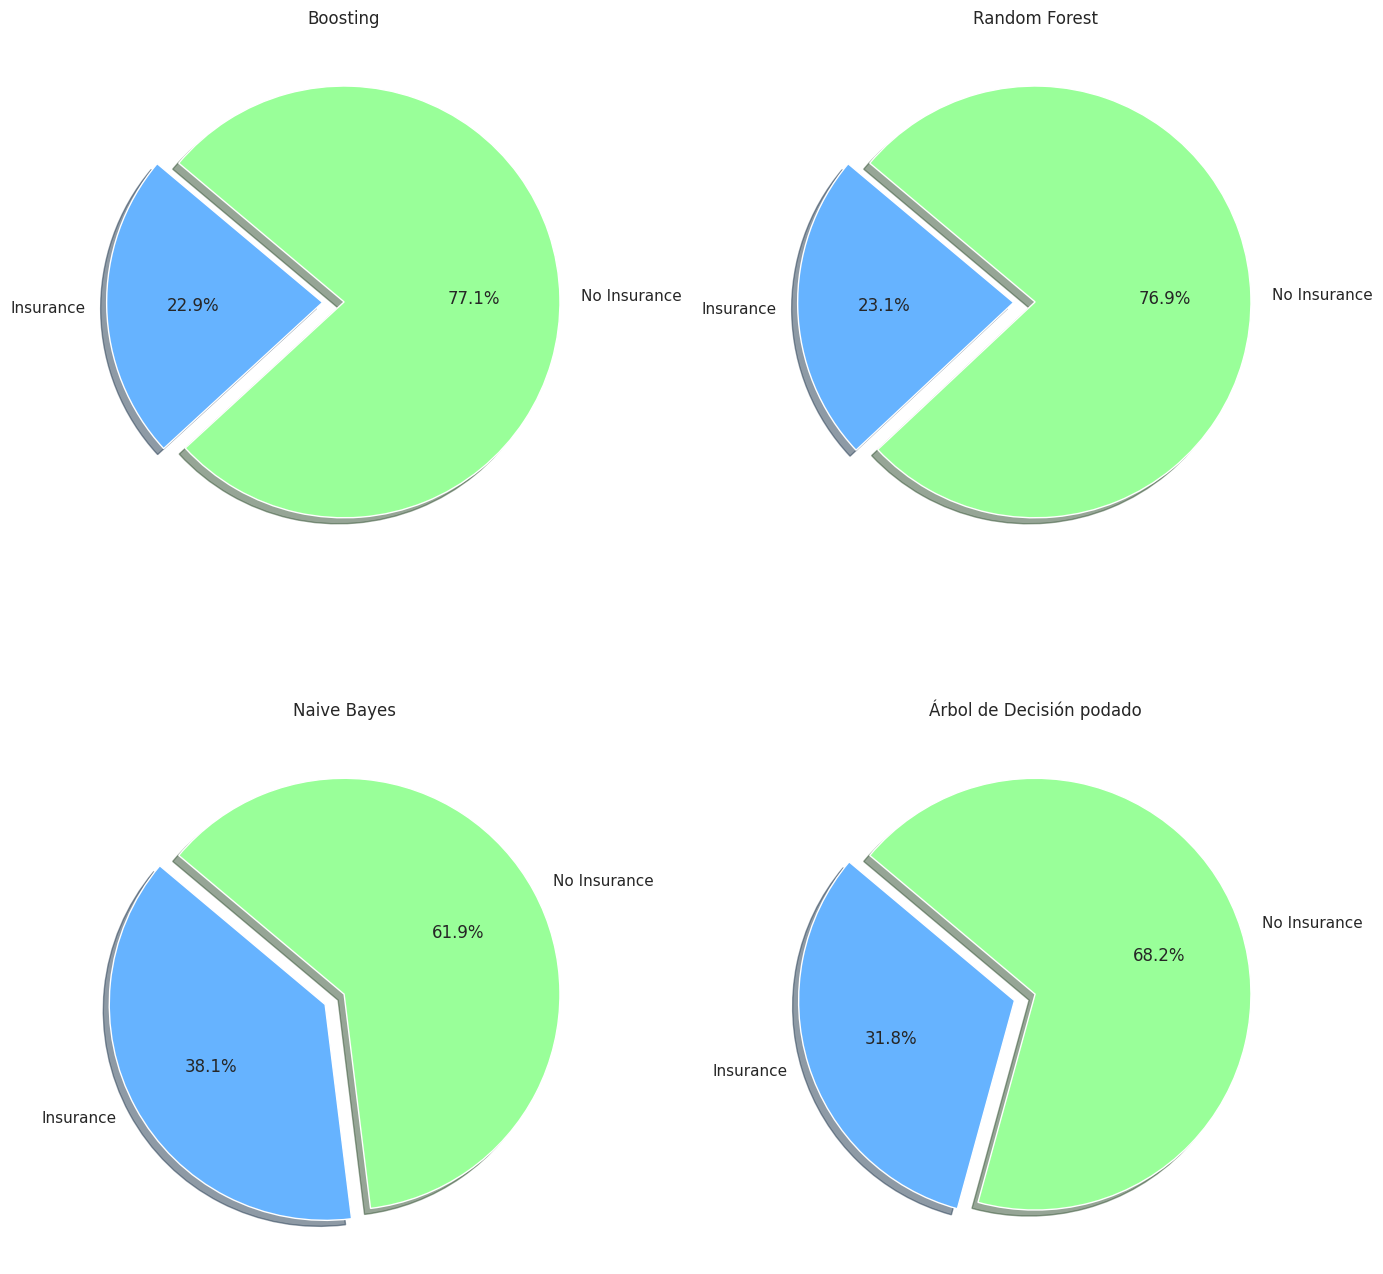

In [ ]:
# Grafico de tarta
sizes_boost = [Insurance_Boost, NoInsurance_Boost]
sizes_RF = [Insurance_RF, NoInsurance_RF]
sizes_NB = [Insurance_NB, NoInsurance_NB]
sizes_CT = [Insurance_CT, NoInsurance_CT]

colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)
labels = ['Insurance', 'No Insurance']


fig, axs = plt.subplots(2, 2, figsize=(14, 14))

axs[0,0].pie(sizes_boost, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0,0].set_title('Boosting')

axs[0,1].pie(sizes_RF, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0,1].set_title('Random Forest')

axs[1,0].pie(sizes_NB, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1,0].set_title('Naive Bayes')

axs[1,1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1,1].set_title('Árbol de Decisión podado')

plt.tight_layout()
plt.show()


# Comunicación de Resultados
Tras evaluar diversos modelos para predecir la compra de seguros de viaje, hemos observado diferencias significativas en su rendimiento. Los modelos Boosting y Random Forest, inicialmente seleccionados, tienen una precisión del 100%, lo que indica su habilidad para prever quiénes comprarán un seguro. No obstante, estos modelos son conservadores y predicen que solo el 22.9% y 23.3% de los clientes, respectivamente, comprarán el seguro.

En contraste, el modelo Naive Bayes tiene una precisión del 59.2%, considerablemente menor que Random Forest. Sin embargo, es más proactivo en sus predicciones, sugiriendo que el 38.1% de los clientes comprarán el seguro. A pesar de su menor precisión, Naive Bayes identifica posibles compradores, reduciendo la pérdida potencial de ventas.

El Árbol de Decisión Poda encuentra un equilibrio intermedio. Con una precisión del 70.3%, predice que el 31.8% de los clientes comprarán el seguro. Es más conservador que Naive Bayes pero más optimista que Random Forest en sus predicciones.

En resumen, si priorizamos evitar falsos positivos y buscamos tener predicciones seguras, deberíamos optar por el modelo Boosting o Random Forest. Sin embargo, si estamos dispuestos a asumir cierto riesgo para aumentar las ventas y no queremos perder oportunidades, el modelo Naive Bayes sería más adecuado. El Árbol de Decisión Poda se encuentra en un punto intermedio y ofrece un buen equilibrio entre precisión y oportunidad de ventas. La elección del modelo dependerá de las metas y la tolerancia al riesgo de la empresa.

# **Consideraciones futuras**

**Segmentación de Clientes:**
   - Segmentar los clientes según las predicciones del modelo. Por ejemplo, crear grupos como "Clientes Altamente Probables de Comprar", "Clientes Moderadamente Probables de Comprar", y "Clientes No Probables de Comprar". Esto ayudará a personalizar las estrategias.

**Diseño de Estrategias de Marketing:**
   - Diseñar estrategias de marketing específicas para cada segmento. Ofrecer incentivos, descuentos u ofertas especiales a los clientes altamente probables de comprar para aumentar las conversiones. Para los clientes moderadamente probables, considerar campañas de concientización para destacar los beneficios del seguro. Para los clientes no probables, enfocar los esfuerzos en otros productos o servicios.
**Seguimiento de Resultados:**
   - Implementar un sistema de seguimiento para evaluar la efectividad de las estrategias implementadas. Ajustar las estrategias según los resultados obtenidos y continúar optimizando las campañas de marketing.

**Feedback y Mejora Continua:**
   - Establecer canales para recibir feedback de los clientes que compraron el seguro. Utilizar esta retroalimentación para mejorar la oferta del seguro y hacer ajustes en futuras campañas.

**Revisión Periódica del Modelo:**
   - Realizar revisiones periódicas del modelo para asegurarse de que sigue siendo preciso y relevante. Si la dinámica del mercado cambia, es posible que hay que ajustar el modelo o considerar otros enfoques de machine learning.